In [1]:
# recombination rates  around a degenerate sequence motif that occurs in repeats
# directly read gz files for chrX and show the first 3 rows
reps <- read.delim('chrX_rmsk.txt.gz', header=TRUE)
head(reps, 3)

,bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
1,585,342,0,0,0,chrX,0,38,-154824226,+,(CCCTAA)n,Simple_repeat,Simple_repeat,3,40,0,1
2,585,392,109,0,0,chrX,41,105,-154824159,+,LTR12C,LTR,ERV1,1090,1153,-425,2
3,585,302,240,31,20,chrX,105,203,-154824061,+,LTR30,LTR,ERV1,544,642,-80,3


In [2]:
# extract the repclass to be 'SINE', 'LINE', 'LTR', 'DNA', 'Simple_repeat'， will be used later
common_repclass <- c('SINE', 'LINE', 'LTR', 'DNA', 'Simple_repeat')
head(reps[reps$repClass %in% common_repclass, ])

,bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
1,585,342,0,0,0,chrX,0,38,-154824226,+,(CCCTAA)n,Simple_repeat,Simple_repeat,3,40,0,1
2,585,392,109,0,0,chrX,41,105,-154824159,+,LTR12C,LTR,ERV1,1090,1153,-425,2
3,585,302,240,31,20,chrX,105,203,-154824061,+,LTR30,LTR,ERV1,544,642,-80,3
4,585,1542,69,0,0,chrX,210,428,-154823836,+,LTR12C,LTR,ERV1,1361,1578,0,4
5,585,3181,80,4,0,chrX,1799,2272,-154821992,+,LTR6B,LTR,ERV1,1,475,-83,5
6,585,2534,108,31,10,chrX,2290,2703,-154821561,+,LTR2C,LTR,ERV1,1,422,-79,6


In [3]:
mtfs <- read.delim('motif_recombrates.txt', header=TRUE)
head(mtfs, 3)

,chr,motif_start,motif_end,dist,recomb_start,recomb_end,recom,motif,pos
1,chrX,35471312,35471325,39323,35430651,35433340,0.0015,CCTCCCTGACCAC,chrX-35471312
2,chrX,35471312,35471325,36977,35433339,35435344,0.0015,CCTCCCTGACCAC,chrX-35471312
3,chrX,35471312,35471325,34797.5,35435343,35437699,0.0015,CCTCCCTGACCAC,chrX-35471312


In [4]:
rpts <- read.delim('motif_repeats.txt', header=TRUE)
head(rpts, 3)

,chr,start,end,name,motif_start
1,chrX,63005829,63006173,L2,63005830
2,chrX,67746983,67747478,L2,67747232
3,chrX,118646988,118647529,L2,118647199


In [5]:
# merging the two dataframes above together, we nned a common key first
mtfs$pos <- paste(mtfs$chr, mtfs$motif_start, sep='-')
rpts$pos <- paste(rpts$chr, rpts$motif_start, sep='-')

In [7]:
# check if we can merge these two dataframe by using the key
table(mtfs$pos %in% rpts$pos)
table(rpts$pos %in% mtfs$pos)
# rpts 'is a subset' of mtfs


FALSE  TRUE 
10832  9218 


TRUE 
 317 

In [8]:
# merging based on if the key matches
i <- match(mtfs$pos, rpts$pos)
table(is.na(i))


FALSE  TRUE 
 9218 10832 

In [9]:
# select the appropriate elements from rpts, and merge
mtfs$repeat_name <- rpts$name[i]

In [11]:
# check the merged data frame with repeat_names
# I don't think pandas can do this.
head(mtfs[!is.na(mtfs$repeat_name), ], 3)

,chr,motif_start,motif_end,dist,recomb_start,recomb_end,recom,motif,pos,repeat_name
99,chrX,63005830,63005843,37772,62965644,62970485,1.4664,CCTCCCTGACCAC,chrX-63005830,L2
100,chrX,63005830,63005843,34673,62970484,62971843,0.0448,CCTCCCTGACCAC,chrX-63005830,L2
101,chrX,63005830,63005843,30084.5,62971842,62979662,0.0448,CCTCCCTGACCAC,chrX-63005830,L2


In [12]:
# remove the NAs
mtfs_inner <- mtfs[!is.na(mtfs $repeat_name), ]
nrow(mtfs_inner)

[1] 9218

In [13]:
# I can also use merge()
recm <- merge(mtfs, rpts, by.x='pos', by.y='pos')
# outer join:
# recm <- merge(mtfs, rpts, by.x='pos', by.y='pos', all.x=TRUE)
head(recm, 3)
nrow(recm)

,pos,chr.x,motif_start.x,motif_end,dist,recomb_start,recomb_end,recom,motif,repeat_name,chr.y,start,end,name,motif_start.y
1,chr1-101890123,chr1,101890123,101890136,34154,101855215,101856736,0.07,CCTCCCTAGCCAC,THE1B,chr1,101890032,101890381,THE1B,101890123
2,chr1-101890123,chr1,101890123,101890136,35717.5,101853608,101855216,0.0722,CCTCCCTAGCCAC,THE1B,chr1,101890032,101890381,THE1B,101890123
3,chr1-101890123,chr1,101890123,101890136,9704,101878637,101882214,0.2445,CCTCCCTAGCCAC,THE1B,chr1,101890032,101890381,THE1B,101890123


[1] 9218

In [14]:
# visualization
library(ggplot2)

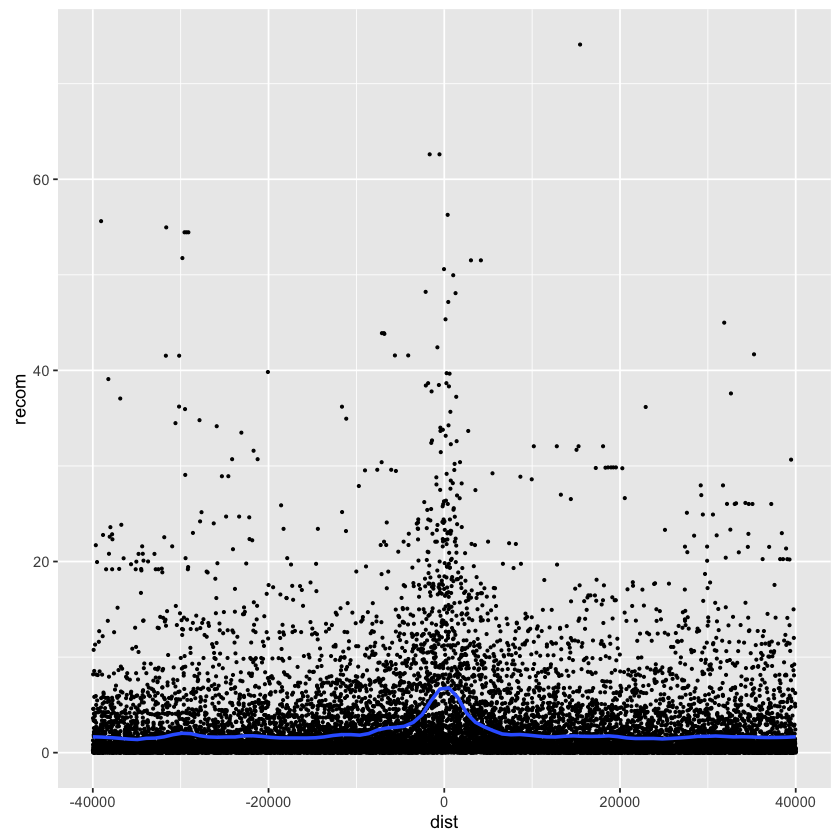

In [16]:
# relationship between recombination rate and distance to a motif
ggplot(mtfs, aes(x=dist, y=recom)) + geom_point(size=0.5) + geom_smooth(method='loess', se=FALSE, span=1/10)

In [17]:
# there are two unique motifs, are there any difference?
unique(mtfs$motif)

[1] CCTCCCTGACCAC CCTCCCTAGCCAC
Levels: CCTCCCTAGCCAC CCTCCCTGACCAC

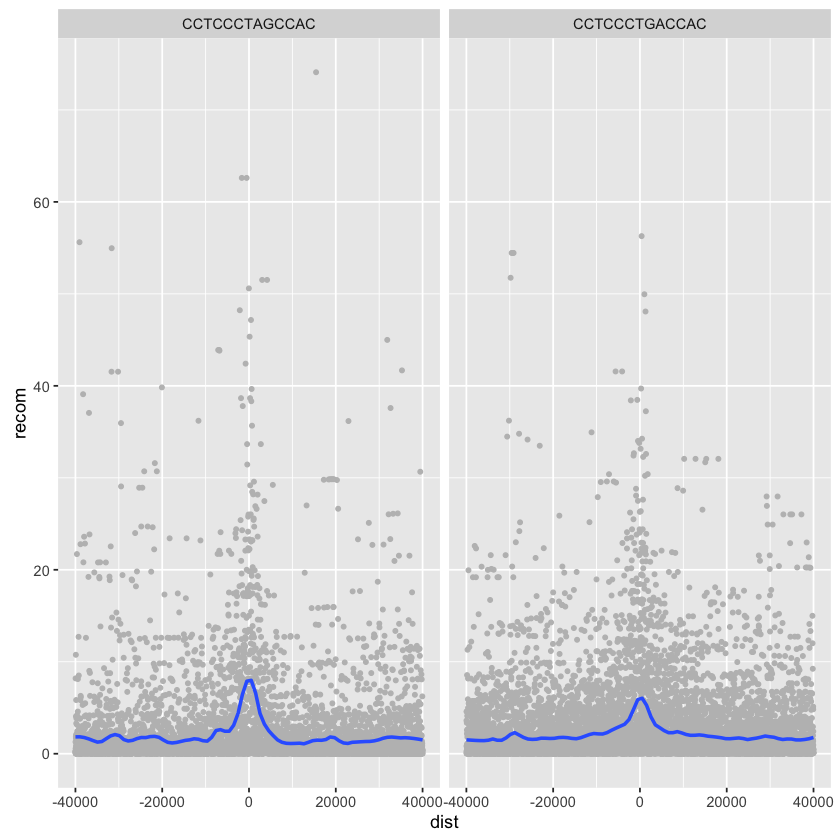

In [19]:
p <- ggplot(mtfs, aes(x=dist, y=recom)) + geom_point(size=1, color='grey')
p <- p + geom_smooth(method='loess', se=FALSE, span=1/10)
p <- p + facet_wrap(~ motif)
p

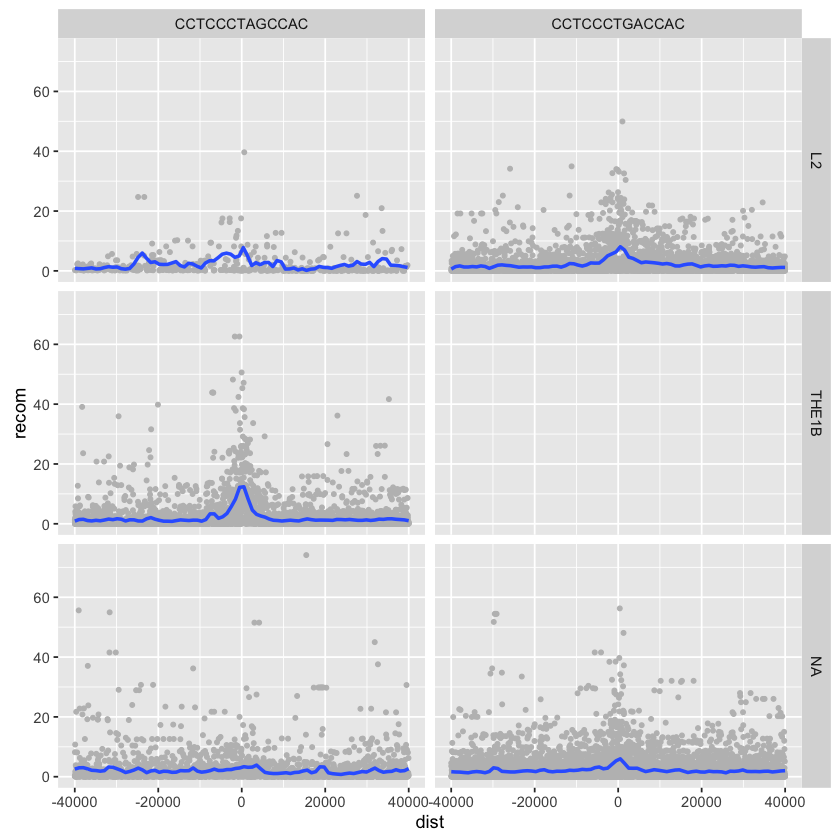

In [20]:
# what about different background?
p <- ggplot(mtfs, aes(x=dist, y=recom)) + geom_point(size=1, color='grey')
p <- p + geom_smooth(method='loess', se=FALSE, span=1/16)
p <- p + facet_grid(repeat_name ~motif)
p
# it seems like CCTCCCTAGCCAC with L2 repeat background have strong effect
# while CCTCCCTGACCAC with THE1B background have strong effect
# this is consistent with the published data